In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [6]:
df.isna().sum().sum()


0

In [7]:
df.drop('Unnamed: 0', inplace=True, axis=1)
columns = df.columns

In [8]:
columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
types = [i for i in columns if i != 'Sales']
df.shape

(200, 4)

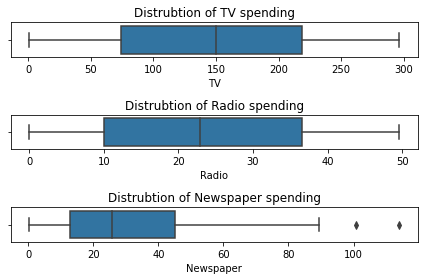

In [10]:
for count, t in enumerate(types):
    plt.subplot(3, 1, count+1)
    sns.boxplot(data=df, x=t)
    plt.title(f'Distrubtion of {t} spending')
plt.tight_layout()
plt.show()

In [11]:
df['total_cost'] = df['TV'] + df['Radio'] + df['Newspaper']


In [12]:
X = df['total_cost'].to_numpy()
y = df['Sales'].to_numpy()
m,b = np.polyfit(X,y,1)

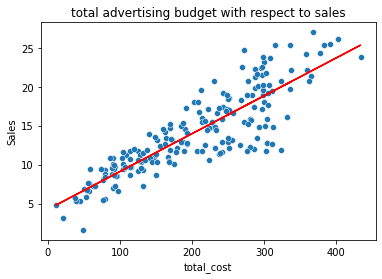

In [13]:
sns.scatterplot(data=df, x = 'total_cost', y = 'Sales')
plt.plot(X, m*X+b, color='red', label='Line of Best Fit')
plt.title('total advertising budget with respect to sales')
plt.show()

Text(0.5, 1.0, 'Correlation matrix')

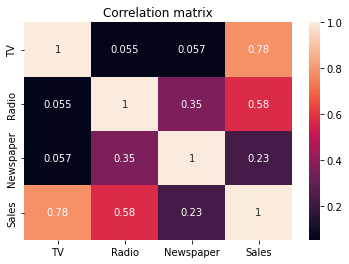

In [14]:
sns.heatmap(df.drop(columns=['total_cost']).corr(), annot=True)
plt.title('Correlation matrix')

In [15]:
df.loc[(df['Sales'] < df['Sales'].quantile(0.25)) &
       (df['Sales'] > df['Sales'].quantile(0.2))]


,TV,Radio,Newspaper,Sales,total_cost
38,43.1,26.7,35.1,10.1,104.9
145,140.3,1.9,9.0,10.3,151.2
149,44.7,25.8,20.6,10.1,91.1
157,149.8,1.3,24.3,10.1,175.4
186,139.5,2.1,26.6,10.3,168.2
191,75.5,10.8,6.0,9.9,92.3


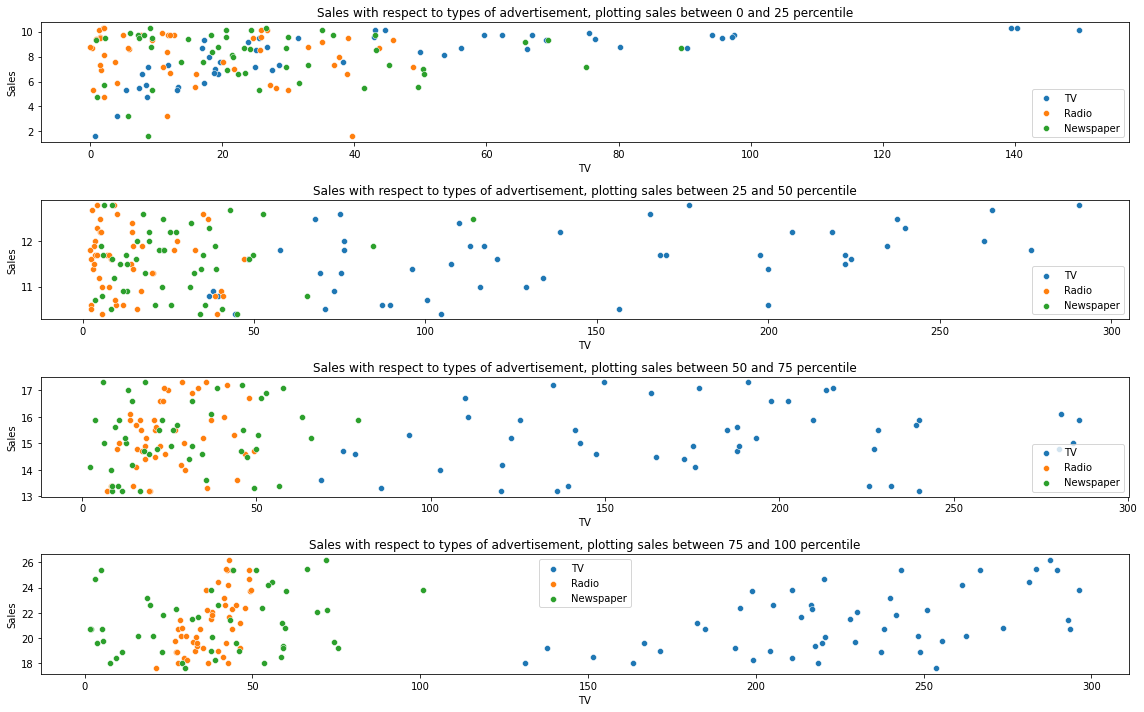

In [16]:
plt.figure(figsize=(16,10))
for count, split in enumerate([0.25, 0.50, 0.75, 1]):
    if count != 0:

        tmp_df = df.loc[(df['Sales'] < df['Sales'].quantile(split)) & (df['Sales'] > df['Sales'].quantile(split - 0.25))]
    else:
         tmp_df = df.loc[(df['Sales'] < df['Sales'].quantile(split))]
    plt.subplot(4,1,count + 1)
    for t in types:
        sns.scatterplot(data=tmp_df, x=t,y='Sales', label=t)
        plt.legend()
    plt.title(f'Sales with respect to types of advertisement, plotting sales between {int(((split - 0.25) * 100))} and {int((split * 100))} percentile')
plt.tight_layout()
plt.show()


In [17]:
def two_plots_num_column(feature):
    
    print(f"the skewness value of {feature} column = {df[feature].skew():.2f}")
    plt.figure(figsize=(10,4))
    
    plt.subplot(1,2,1)
    plt.title('histgram')
    sns.histplot(data=df, x=feature, kde=True)
    plt.axvline(x = df[feature].mean(), c = 'red')
    plt.axvline(x = df[feature].median(), c = 'green')

    plt.subplot(1,2,2)
    plt.title('Boxplot')
    sns.boxplot(y=df[feature])
    plt.show()

the skewness value of TV column = -0.07


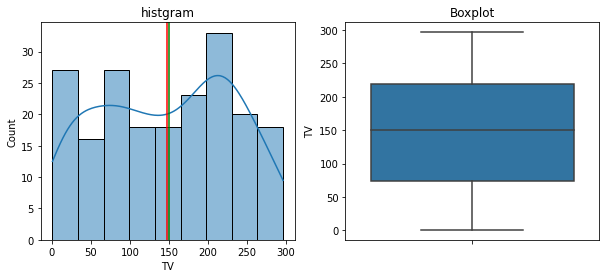

In [18]:
two_plots_num_column('TV')


the skewness value of Radio column = 0.09


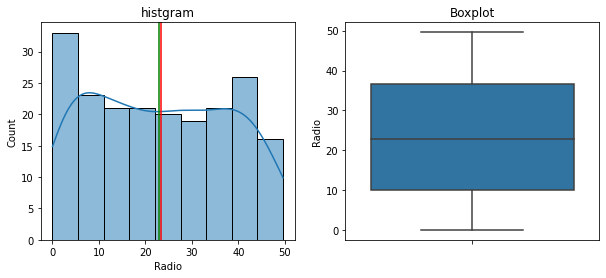

In [19]:
two_plots_num_column('Radio')


the skewness value of Newspaper column = 0.89


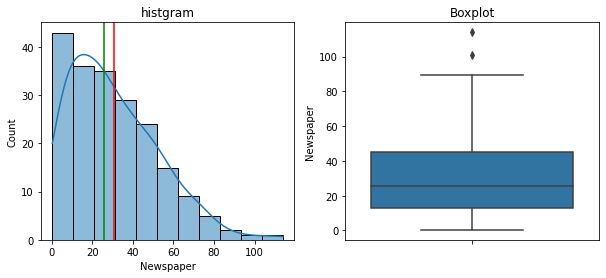

In [20]:
two_plots_num_column("Newspaper")


In [21]:
q1, q3 = df['Newspaper'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

df.loc[(df["Newspaper"] < lower_bound) | (df["Newspaper"] > upper_bound), "Newspaper"] = np.nan
df["Newspaper"].fillna(df["Newspaper"].mean(), inplace=True)

the skewness value of Newspaper column = 0.65


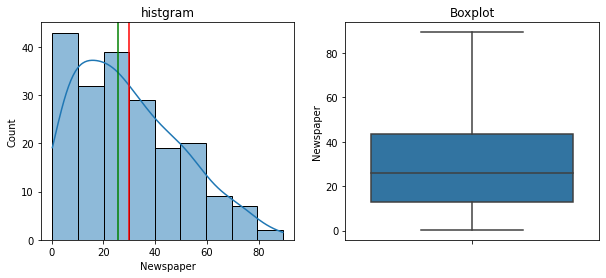

In [22]:
two_plots_num_column("Newspaper")


the skewness value of Sales column = 0.41


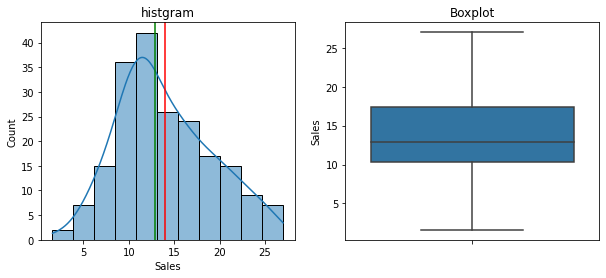

In [23]:
two_plots_num_column('Sales')


the skewness value of total_cost column = 0.05


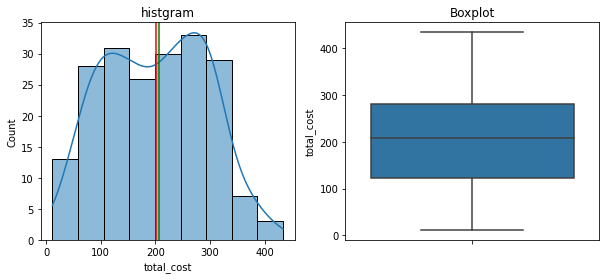

In [24]:
two_plots_num_column('total_cost')


/usr/local/lib/python3.9/site-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


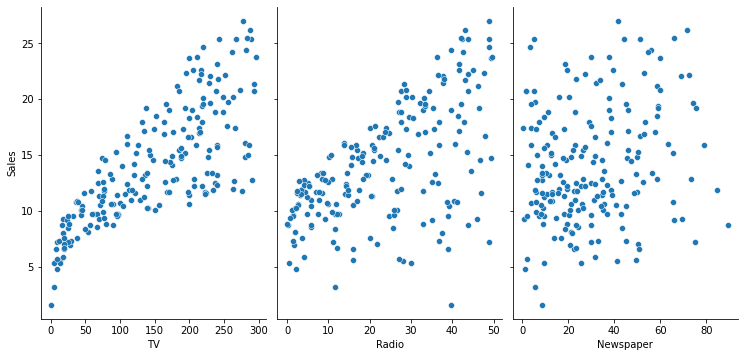

In [25]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', size=5, aspect=0.7);

<Figure size 720x720 with 0 Axes>

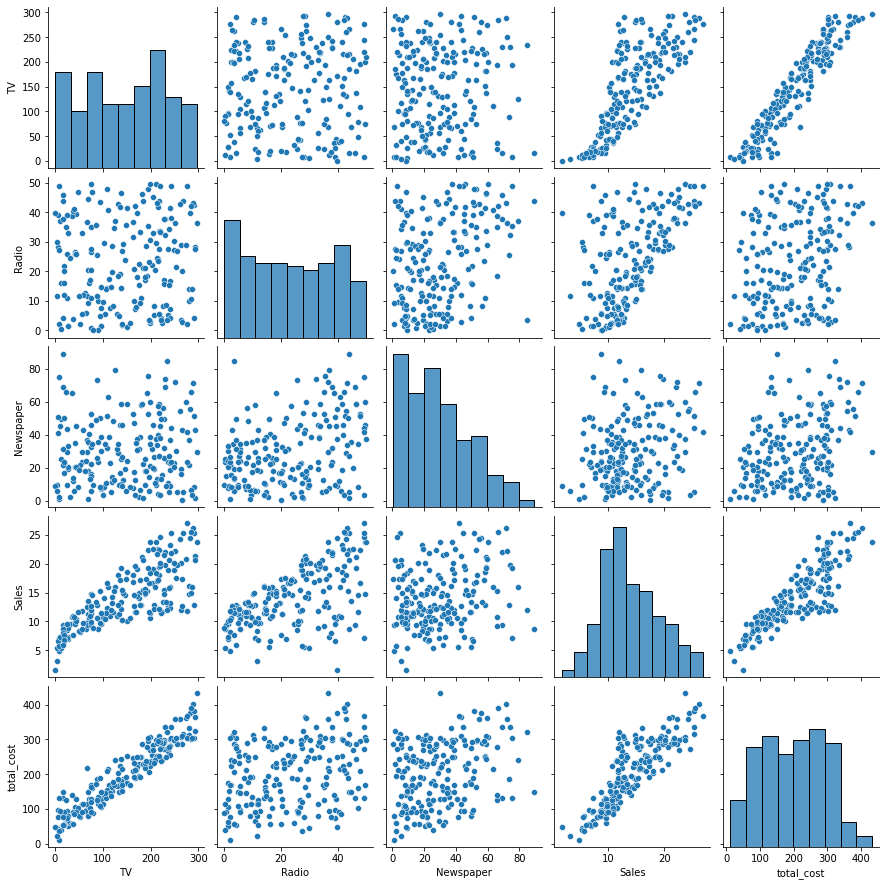

In [26]:
plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show();

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

columns= df.drop(columns=['Sales', 'total_cost']).columns
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(df.drop(columns=['Sales', 'total_cost']).values, i)
                          for i in range(len(columns))]
  
vif_data

,feature,VIF
0,TV,2.511802
1,Radio,3.299805
2,Newspaper,3.137342


In [28]:
X = df.drop(["Sales", 'total_cost'],axis=1)
y = df.Sales

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42 ,test_size=0.25)

In [31]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)

y_pred= model.predict(X_train)

In [32]:
from sklearn.metrics import r2_score, mean_absolute_error

print("R squared: {}".format(r2_score(y_true=y_train ,y_pred=y_pred)))
print(f"mae : {mean_absolute_error(y_train,y_pred)}")

R squared: 0.8966082409611836
mae : 1.2157059252779596


In [37]:
residuals = y_train.values - y_pred

mean_residuals = np.mean(residuals)
print("Mean of Residuals {:.5}".format(mean_residuals))

Mean of Residuals 2.0132e-16


/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


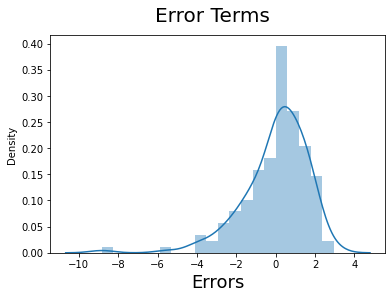

In [38]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot(residuals , bins=20)
fig.suptitle('Error Terms', fontsize = 20)    
plt.xlabel('Errors', fontsize = 18)
plt.show()

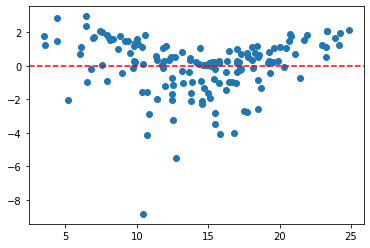

In [39]:
plt.scatter(y_pred , residuals)
plt.axhline(y=0,color="red" ,linestyle="--")
plt.show()

In [40]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['f_statistic' , 'p_value' , 'lagrange multipler stat']
test = sms.het_breuschpagan(residuals , X_train)
lzip(name , test)

[('f_statistic', 15.759787953447212),
 ('p_value', 0.00037827316041646824),
 ('lagrange multipler stat', 5.752595276377501)]